In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\Task4\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [9]:
df.TV.value_counts().reset_index()

,TV,count
0,199.8,2
1,109.8,2
2,17.2,2
3,177.0,2
4,222.4,2
...,...,...
185,139.3,1
186,216.8,1
187,199.1,1
188,26.8,1


In [10]:
df.Radio.value_counts().reset_index()

,Radio,count
0,4.1,3
1,5.7,3
2,13.9,2
3,14.3,2
4,36.9,2
...,...,...
162,42.8,1
163,14.5,1
164,30.6,1
165,33.0,1


In [11]:
df.Newspaper.value_counts().reset_index()

,Newspaper,count
0,9.3,3
1,25.6,3
2,8.7,3
3,34.6,2
4,8.5,2
...,...,...
167,27.2,1
168,31.7,1
169,19.3,1
170,31.3,1


In [12]:
df.Sales.value_counts().reset_index()

,Sales,count
0,11.9,5
1,16.7,5
2,20.7,4
3,11.0,3
4,11.3,3
...,...,...
116,13.4,1
117,24.2,1
118,8.1,1
119,5.5,1


In [13]:
pd.crosstab(df.TV,df.Sales).head()

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
TV,,,,,,,,,,,,,,,,,,,,,
0.7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
pd.crosstab(df.Radio,df.Sales).head()

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
Radio,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pd.crosstab(df.Newspaper,df.Sales).head()

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
Newspaper,,,,,,,,,,,,,,,,,,,,,
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


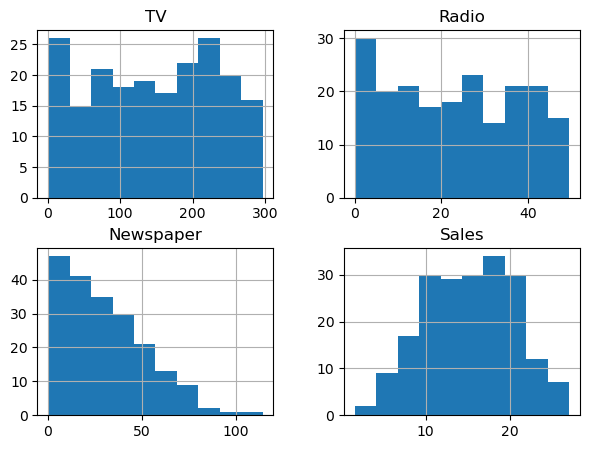

In [31]:
df.hist(figsize=(7,5))
plt.show()

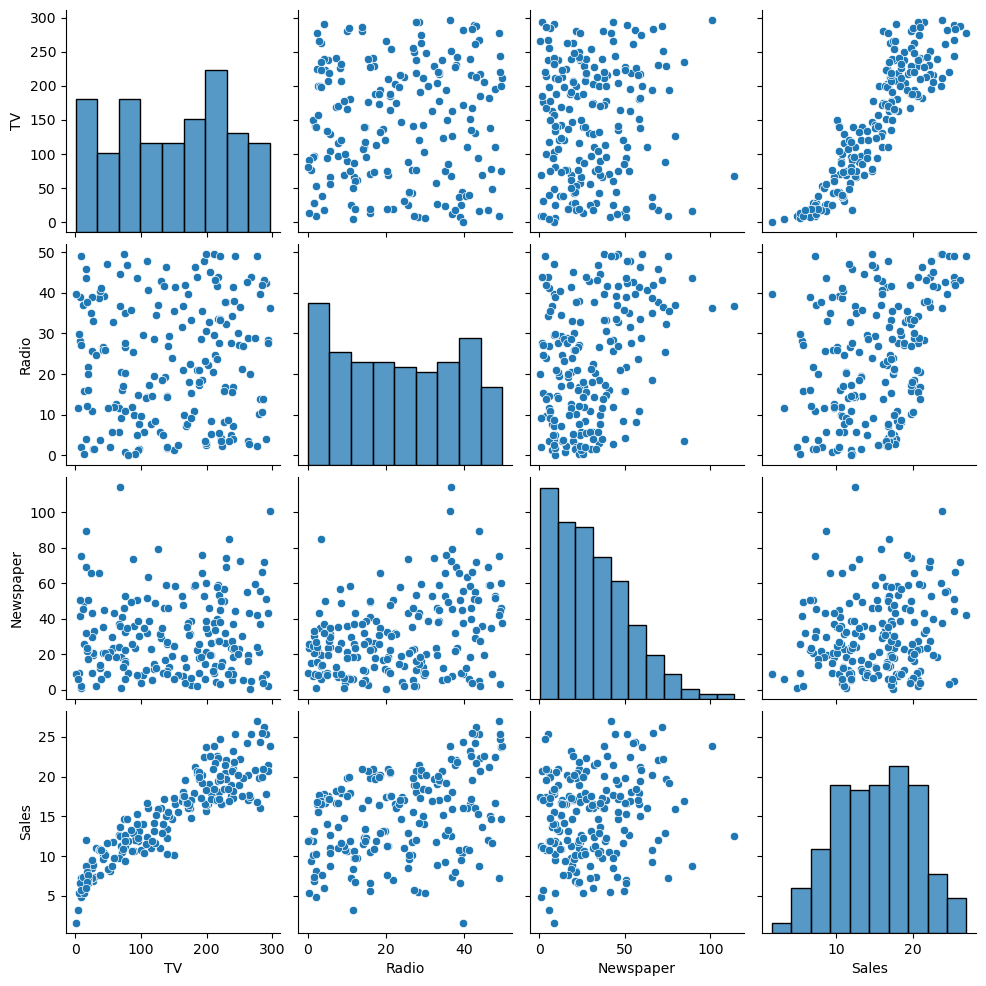

In [32]:
sns.pairplot(df);
plt.show()

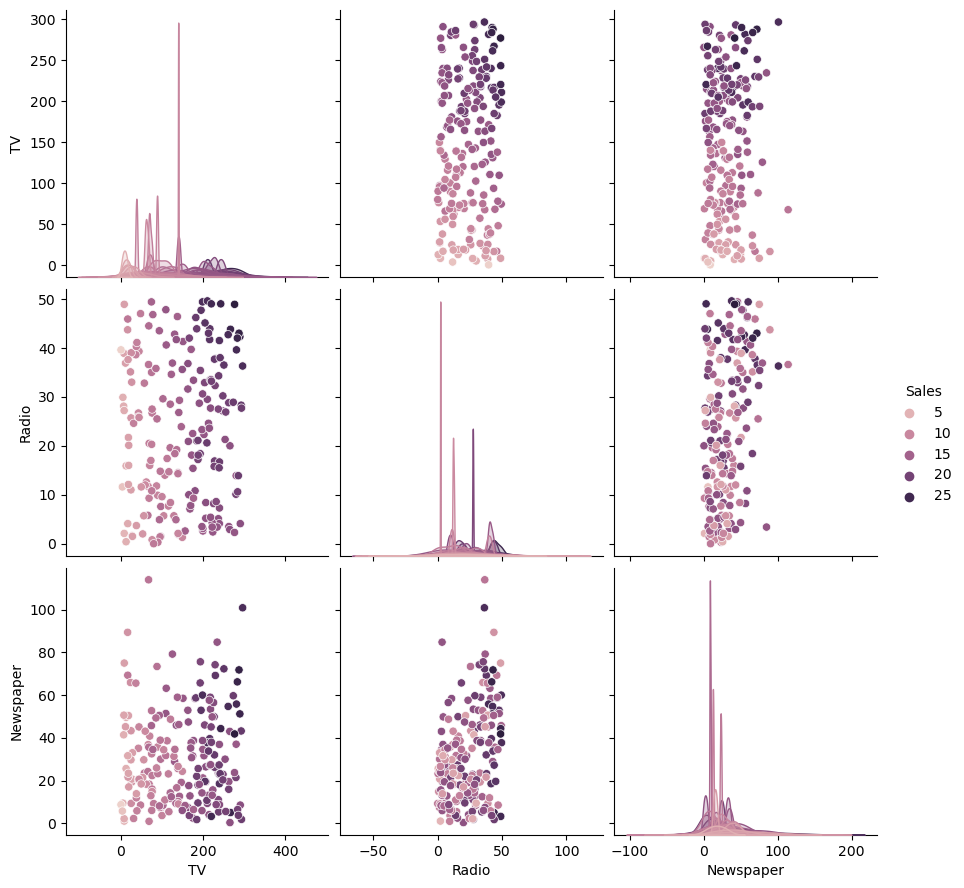

In [33]:
sns.pairplot(df,hue="Sales",size=3);
plt.show()

<Axes: xlabel='Sales', ylabel='Density'>

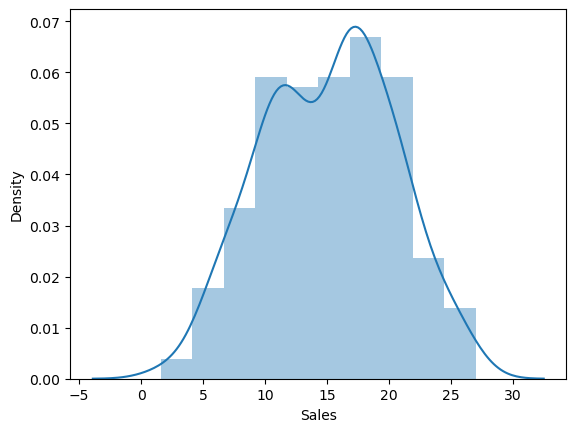

In [38]:
sns.distplot(df['Sales'])

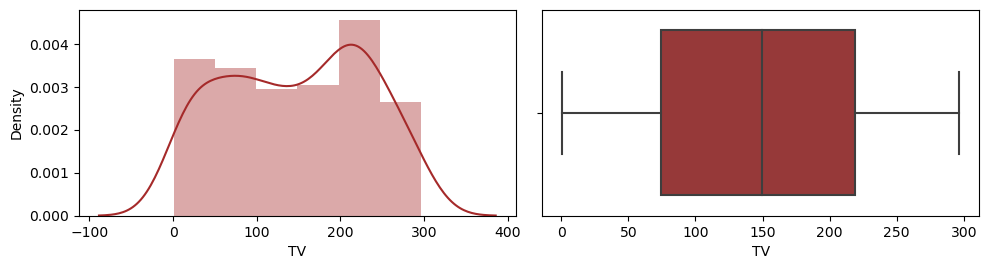

In [39]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['TV'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['TV'],color="brown")

plt.tight_layout()
plt.show()

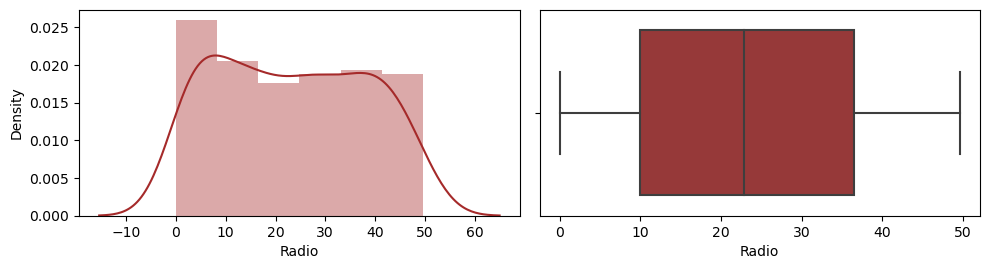

In [40]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['Radio'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['Radio'],color="brown")

plt.tight_layout()
plt.show()

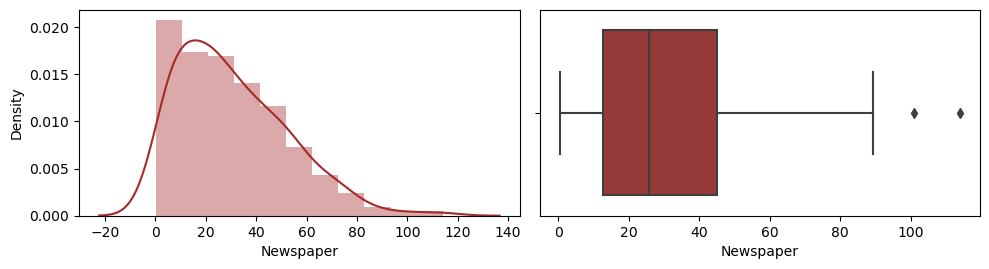

In [41]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['Newspaper'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['Newspaper'],color="brown")

plt.tight_layout()
plt.show()

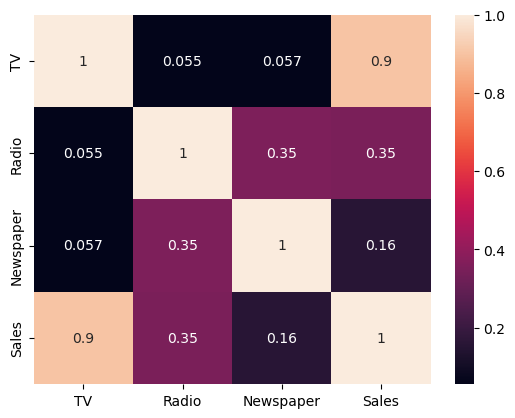

In [42]:
dataplot = sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [19]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [126]:
x = df.drop('Sales', axis=1)
y=df['Sales']


In [160]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

In [168]:
model= LinearRegression()


In [169]:
model.fit(X_train, y_train)

LinearRegression()

In [170]:
model.score(X_train,y_train)

0.9001416005862131

In [171]:
model.score(X_test,y_test)

0.9059011844150825

In [203]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300)
model = rfr.fit(X_train, y_train)


In [204]:
model.score(X_train,y_train)


0.9914252452036012

In [205]:
model.score(X_test,y_test)

0.9534139112811161